# Compare two GEOS-Chem diagnostic datasets
Includes GEOS-Chem Classic and GCHP, binary and netcdf formats. Datasets on different grids and at different grid resolutions can be compared directly following the example in this notebook. Plots may be displayed inline in this notebook or sent to PDF.

## Tips for using Jupyter Notebook

1. You can use unix commands such as ls and pwd
2. Hover over a function and press Shift-Tab to see function arguments
3. Access documentation with help(fnct) or fnct?, where fnct is function name
4. See function source code with fnct??
5. Use tab-complete to see what is possible, e.g. gcpy.cTAB
6. Explore modules with dir(module), e.g. dir(gcpy) or dir(gcpy.core)


## Import dependencies

In [1]:
import os
import numpy as np
import xarray as xr
import xbpch
import gcpy

# Enable auto-reloading modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import warnings; warnings.filterwarnings("ignore")

## Choose comparison type

In [2]:
# Choose comparison type: 
#   'bpch' = bpch vs bpch
#   'nc' = nc vs nc
#.  'bpch_vs_nc' = bpch vs nc
# NOTE: The example in the existing settings of this notebook is for bpch vs nc

#comparison = 'bpch'
#comparison = 'nc'
comparison = 'bpch_vs_nc'

## Load data

### Binary data (if using)

In [3]:
# Set bpch ref data is doing bpch vs nc or bpch vs bpch
if 'bpch' in comparison:
    refdir = '/path/to/ref/binary/file/'
    refbpfile = os.path.join(refdir,'trac_avg.geosfp_4x5_standard.201607010000')
    reftracerinfo = os.path.join(refdir,'tracerinfo.dat') 
    refdiaginfo = os.path.join(refdir,'diaginfo.dat')
    refdata = xbpch.open_bpchdataset(refbpfile, tracerinfo_file=reftracerinfo, diaginfo_file=refdiaginfo)
    
# Set bpch dev data if doing bpch vs bpch
if comparison == 'bpch':
    devdir = '/path/to/dev/binary/file'
    devbpfile = os.path.join(devdir,'trac_avg.geosfp_4x5_standard.201607010000')
    devtracerinfo = os.path.join(devdir,'tracerinfo.dat') 
    devdiaginfo = os.path.join(devdir,'diaginfo.dat')
    devdata = xbpch.open_bpchdataset(devbpfile, tracerinfo_file=reftracerinfo, diaginfo_file=refdiaginfo)

### Netcdf data (if using)

In [4]:
# Set netcdf ref data if doing nc vs nc
if comparison == 'nc':
    refdata = xr.open_dataset('/path/to/ref/netcdf/file')
    
# Set netcdf dev data if doing bpch vs nc
if 'nc' in comparison:
    devdata = xr.open_dataset('/path/to/dev/netcdf/file')

### Inspect datasets

In [5]:
refdata

<xarray.Dataset>
Dimensions:            (lat: 46, lev: 72, lev_edge: 73, lon: 72)
Coordinates:
  * lev                (lev) float64 0.9925 0.9775 ... 1.614e-05 4.935e-06
  * lon                (lon) float64 -180.0 -175.0 -170.0 ... 165.0 170.0 175.0
  * lat                (lat) float64 -89.0 -86.0 -82.0 -78.0 ... 82.0 86.0 89.0
Dimensions without coordinates: lev_edge
Data variables:
    PL_SUL_S_SO2dms    (lon, lat, lev) float32 dask.array<shape=(72, 46, 72), chunksize=(72, 46, 72)>
    PL_SUL_S_SO2no3    (lon, lat, lev) float32 dask.array<shape=(72, 46, 72), chunksize=(72, 46, 72)>
    PL_SUL_S_SO2tot    (lon, lat, lev) float32 dask.array<shape=(72, 46, 72), chunksize=(72, 46, 72)>
    PL_SUL_S_MSAdms    (lon, lat, lev) float32 dask.array<shape=(72, 46, 72), chunksize=(72, 46, 72)>
    PL_SUL_S_SO4gas    (lon, lat, lev) float32 dask.array<shape=(72, 46, 72), chunksize=(72, 46, 72)>
    PL_SUL_S_SO4h2o2   (lon, lat, lev) float32 dask.array<shape=(72, 46, 72), chunksize=(72, 46, 72)>
 

In [6]:
devdata

<xarray.Dataset>
Dimensions:               (lat: 144, lev: 72, lon: 24, time: 1)
Coordinates:
  * lon                   (lon) float64 1.0 2.0 3.0 4.0 ... 21.0 22.0 23.0 24.0
  * lat                   (lat) float64 1.0 2.0 3.0 4.0 ... 142.0 143.0 144.0
  * lev                   (lev) float64 1.0 2.0 3.0 4.0 ... 69.0 70.0 71.0 72.0
  * time                  (time) datetime64[ns] 2016-07-01T00:30:00
Data variables:
    SpeciesConc_NO        (time, lev, lat, lon) float32 ...
    SpeciesConc_O3        (time, lev, lat, lon) float32 ...
    SpeciesConc_PAN       (time, lev, lat, lon) float32 ...
    SpeciesConc_CO        (time, lev, lat, lon) float32 ...
    SpeciesConc_ALK4      (time, lev, lat, lon) float32 ...
    SpeciesConc_ISOP      (time, lev, lat, lon) float32 ...
    SpeciesConc_HNO3      (time, lev, lat, lon) float32 ...
    SpeciesConc_H2O2      (time, lev, lat, lon) float32 ...
    SpeciesConc_ACET      (time, lev, lat, lon) float32 ...
    SpeciesConc_MEK       (time, lev, lat, l

### If using binary data, process it further

In [7]:
# Reorder the dimensions in the array to always be time, lev, lat, lon (so same order as netcdf)
# NOTE: check dimensions in refdata in previous step. Make sure they are all here and there are no extra.
if 'bpch' in comparison:
    refdata = refdata.transpose('lev','lev_edge','lat', 'lon') 
if comparison == 'bpch':
    devdata = devdata.transpose('lev','lev_edge','lat', 'lon')     

In [8]:
# convert binary names to analogous netcdf diagnostic names
# NOTE: not necessary if comparing bpch vs bpch and not doing an official GEOS-Chem benchmark
if 'bpch' in comparison:
    refdata = gcpy.convert_bpch_names_to_netcdf_names(refdata)    
if comparison == 'bpch':
    devdata = gcpy.convert_bpch_names_to_netcdf_names(devdata)

In [9]:
# Change the units for concentrations. If ppb or ppbv then change to mol/mol. Will need to do this for
# other binary diagnostic units if they are not the same as netcdf. Ideally put the mapping in a dictionary.
conc_units = ['ppb','ppbv']
if 'bpch' in comparison:
    for var in refdata.data_vars:
        if refdata[var].units.strip() in conc_units:
            refdata[var].attrs['units'] = 'mol mol-1 dry'
            refdata[var].values = refdata[var].values * 1e-9
if comparison == 'bpch':
    for var in refdata.data_vars:
        if devdata[var].units.strip() in conc_units:
            devdata[var].attrs['units'] = 'mol mol-1 dry'
            devdata[var].values = devdata[var].values * 1e-9

### Inspect common variables in ref and dev
If you are comparing binary and netcdf diagnostics then you can expect a large number of variables with different names. 

In [10]:
[cmnvars, cmnvars1D, cmnvars2D, cmnvars3D] = gcpy.compare_varnames(refdata, devdata)

161 common variables
686 variables in ref only (skip)
   Variable names: ['ProdSO2fromDMSandOH', 'ProdSO2fromDMSandNO3', 'ProdSO2fromDMS', 'ProdMSAfromDMS', 'ProdSO4fromGasPhase', 'ProdSO4fromH2O2inCloud', 'ProdSO4fromO3inCloud', 'PL_SUL_S_SO4o2', 'ProdSO4fromO3inSeaSalt', 'PL_SUL_S_LOH', 'PL_SUL_S_LNO3', 'ProdSO4fromOxidationOnDust', 'ProdNITfromHNO3uptakeOnDust', 'ProdSO4fromUptakeOfH2SO4g', 'LossHNO3onSeaSalt', 'ProdSO4fromHOBrInCloud', 'ProdSO4fromSRO3', 'ProdSO4fromSRHObr', 'ProdSO4fromO3s', 'PL_SUL_S_HPLUS', 'EmisDST1_Natural', 'EmisDST2_Natural', 'EmisDST3_Natural', 'EmisDST4_Natural', 'BC_ANTH_BLKC', 'BC_BIOF_BLKC', 'BC_BIOB_BLKC', 'EmisOC_Anthro', 'OC_BIOF_ORGC', 'OC_BIOB_ORGC', 'ProdBCPIfromBCPO', 'OC_BIOG_ORGC', 'ProdOCPIfromOCPO', 'EmisSALA_Natural', 'EmisSALC_Natural', 'EmisACET_Monoterp', 'EmisACET_MethylBut', 'EmisACET_DirectBio', 'EmisACET_Ocean', 'EmisDMS_Ocean', 'EmisSO2_Aircraft', 'SO2_AN_S_SO2', 'SO2_BIOB_SO2', 'SO2_BIOF_SO2', 'EmisSO2_EVOL', 'EmisSO2_NVOL', 'EmisSO

## Set and ref and dev strings for including in plots

In [11]:
refstr='GCC binary, 12.2.0' # EDIT AS NEEDED
devstr='GCHP netcdf, 12.2.0' # EDIT AS NEEDED
    
print('Ref: {}'.format(refstr))
print('Dev: {}'.format(devstr))

Ref: GCC binary, 12.2.0
Dev: GCHP netcdf, 12.2.0


## Compare species concentrations

### Define list of variables to plot

In [12]:
#------------ Below are a few examples ---------------

# Example 1: all species
#desc='spc_conc'
#varlist = [k for k in cmnvars if 'SpeciesConc_' in k]

# Example 2: Subset of species
#desc='Dust'
#varlist = [k for k in cmnvars if 'DST' in k and 'SpeciesConc' in k]

# Example 3: one species
desc='Ozone'
varlist = ['SpeciesConc_O3']

print('{} variables found'.format(len(varlist)))
varlist

1 variables found


['SpeciesConc_O3']

### Inspect units to make sure they match (they might not if binary versus netcdf)

In [13]:
for var in varlist:
    print(var)
    print('   ref units: {}'.format(refdata[var].units))
    print('   dev units: {}'.format(devdata[var].units))

SpeciesConc_O3
   ref units: mol mol-1 dry
   dev units: mol mol-1 dry


In [14]:
# If units do not match, the following code may be helpful:
#
# Print all unique units in bpch datasets
# unitstrs = []
# for var in refdata.data_vars:
#     if refdata[var].units.strip() not in unitstrs:
#         unitstrs.append(refdata[var].units.strip())
# unitstrs

### Plot inline in notebook
If you use this function in ipython then import matplotlib.pyplot as plt and do plt.show() to create pop-up with figure.

Reuse existing file: ./conservative_4x5_1x1.25.nc
Reuse existing file: ./conservative_c24_1x1.25_0.nc
Reuse existing file: ./conservative_c24_1x1.25_1.nc
Reuse existing file: ./conservative_c24_1x1.25_2.nc
Reuse existing file: ./conservative_c24_1x1.25_3.nc
Reuse existing file: ./conservative_c24_1x1.25_4.nc
Reuse existing file: ./conservative_c24_1x1.25_5.nc


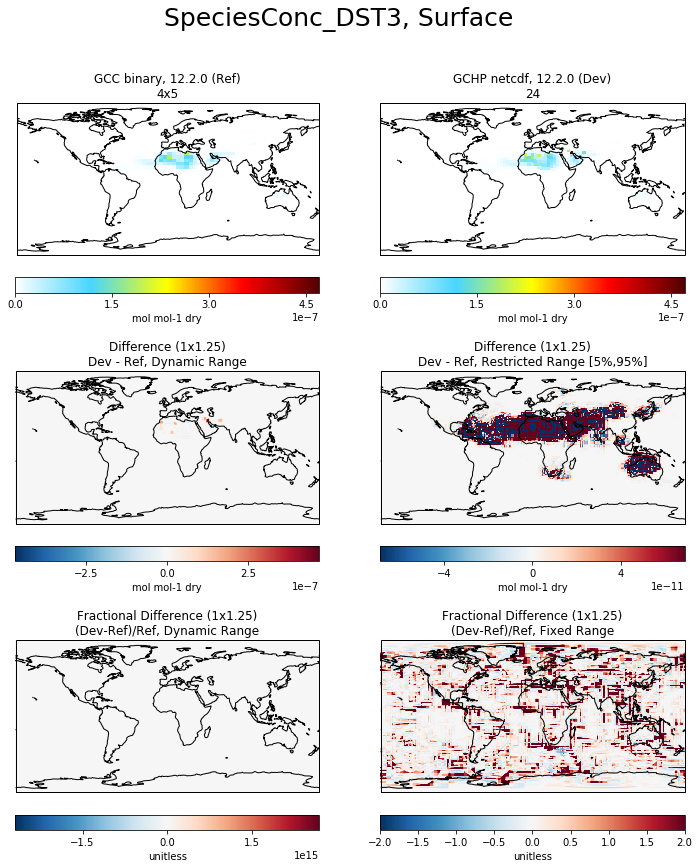

In [15]:
# Try hovering over function name and pressing shift-tab to see optional arguments lst 
# NOTE: cmpres argument is only for when ref and dev grid resolutions differ
gcpy.compare_single_level( refdata, refstr, devdata, devstr, cmpres='1x1.25', varlist=['SpeciesConc_DST3'])

Reuse existing file: ./conservative_4x5_1x1.25.nc
Reuse existing file: ./conservative_c24_1x1.25_0.nc
Reuse existing file: ./conservative_c24_1x1.25_1.nc
Reuse existing file: ./conservative_c24_1x1.25_2.nc
Reuse existing file: ./conservative_c24_1x1.25_3.nc
Reuse existing file: ./conservative_c24_1x1.25_4.nc
Reuse existing file: ./conservative_c24_1x1.25_5.nc


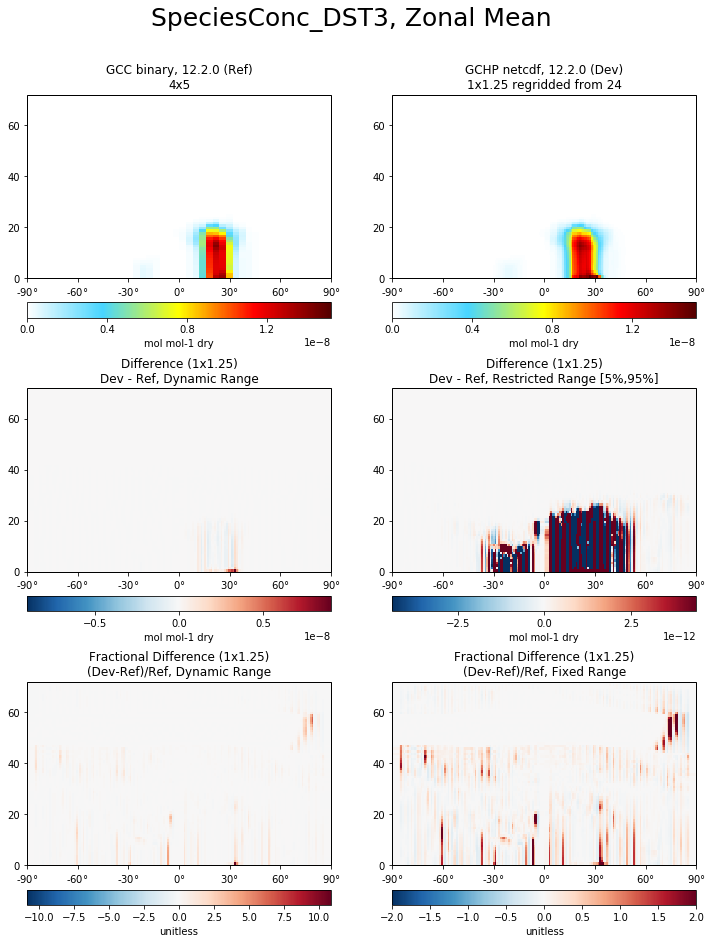

In [16]:
# Zonal mean - quick plot
gcpy.compare_zonal_mean( refdata, refstr, devdata, devstr, varlist=['SpeciesConc_DST3'])

### Send plots to PDF
If you want to a create a pdf with more than one species then redefine varlist prior to passing to plot functions.

In [17]:
# This directory must already exist
plotsdir = '/path/to/plots/directory'

In [18]:
# Surface - PDF
pdfname = os.path.join(plotsdir,'{}_surface_{}_diag.pdf'.format(desc,comparison))
gcpy.compare_single_level( refdata, refstr, devdata, devstr, varlist=varlist, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')

Reuse existing file: ./conservative_4x5_1x1.25.nc
Reuse existing file: ./conservative_c24_1x1.25_0.nc
Reuse existing file: ./conservative_c24_1x1.25_1.nc
Reuse existing file: ./conservative_c24_1x1.25_2.nc
Reuse existing file: ./conservative_c24_1x1.25_3.nc
Reuse existing file: ./conservative_c24_1x1.25_4.nc
Reuse existing file: ./conservative_c24_1x1.25_5.nc

Creating /Users/lizzielundgren/gc/data/12.2.0_test/plots/Ozone_surface_bpch_vs_nc_diag.pdf for 1 variables
0 

In [19]:
# Zonal mean - PDF
pdfname = os.path.join(plotsdir,'{}_zonalmean_{}_diag.pdf'.format(desc, comparison))
gcpy.compare_zonal_mean( refdata, refstr, devdata, devstr, varlist=varlist, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')

Reuse existing file: ./conservative_4x5_1x1.25.nc
Reuse existing file: ./conservative_c24_1x1.25_0.nc
Reuse existing file: ./conservative_c24_1x1.25_1.nc
Reuse existing file: ./conservative_c24_1x1.25_2.nc
Reuse existing file: ./conservative_c24_1x1.25_3.nc
Reuse existing file: ./conservative_c24_1x1.25_4.nc
Reuse existing file: ./conservative_c24_1x1.25_5.nc

Creating /Users/lizzielundgren/gc/data/12.2.0_test/plots/Ozone_zonalmean_bpch_vs_nc_diag.pdf for 1 variables
0 